In [130]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df1 = pd.read_csv("~/Downloads/insurance.csv")
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
343,63,1,36.765,0,0,0,13981.85035
344,49,0,41.470,4,0,2,10977.20630
345,34,0,29.260,3,0,2,6184.29940
346,33,1,35.750,2,0,2,4889.99950


In [137]:
#age groups

df1.loc[df1['age']<=19, 'age_group'] = '10-19'
df1.loc[df1['age'].between(20,24), 'age_group'] = '20-24'
df1.loc[df1['age'].between(25,30), 'age_group'] = '25-30'
df1.loc[df1['age'].between(31,35), 'age_group'] = '31-35'
df1.loc[df1['age'].between(36,40), 'age_group'] = '36-40'
df1.loc[df1['age'].between(41,50), 'age_group'] = '41-50'
df1.loc[df1['age'].between(51,60), 'age_group'] = '51-60'
df1.loc[df1['age']>60, 'age_group'] = '60+'

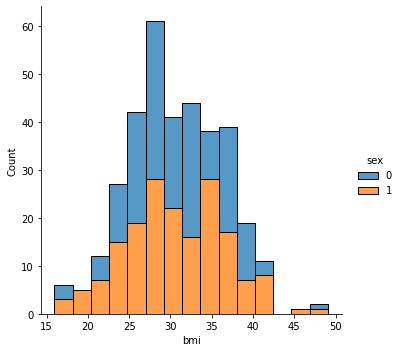

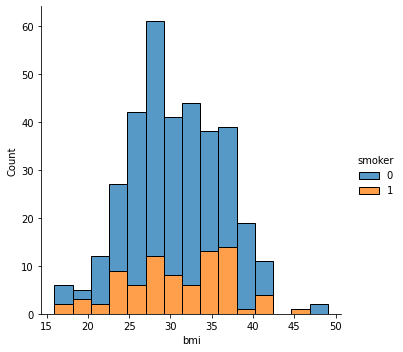

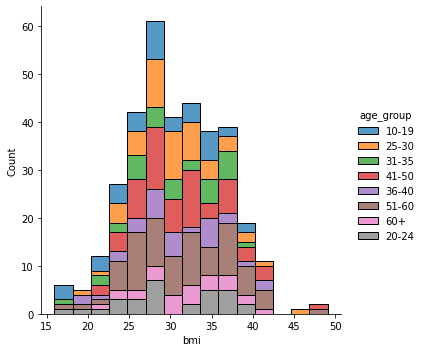

In [138]:
#Data Distribution
sns.displot(df1, x="bmi", hue="sex", multiple="stack")
sns.displot(df1, x="bmi", hue="smoker", multiple="stack")
sns.displot(df1, x="bmi", hue="age_group", multiple="stack")


In [218]:
desc_bmi = df1["bmi"].describe()
desc_age = df1["age"].describe()
desc_sex = df1["sex"].describe()


In [128]:
# convert class labels in numerical data 
df1['label']= df1['smoker'].replace([0],'green')
df1['label'] = df1['label'].replace([1],'red')





#df1.plot.scatter(x='age',y='bmi', c= 'label', s= 10)


df1
#df_group = df1.groupby(['age', 'bmi']).value_counts()
#df_group
df1["std"] = df1.groupby(['age'])['bmi'].transform('std')
df1["mean"] = df1.groupby(['age'])['bmi'].transform('mean')

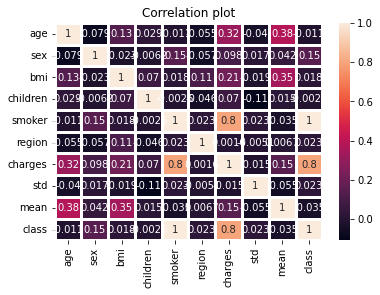

In [124]:
corr_plot = sns.heatmap(df1.corr(),annot = True,linewidths=3 )
plt.title("Correlation plot")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='mean', ylabel='std'>

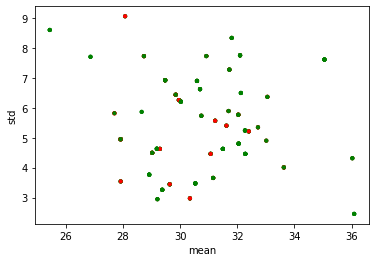

In [18]:
df1.plot.scatter(x='mean',y='std', c= 'label', s= 10)

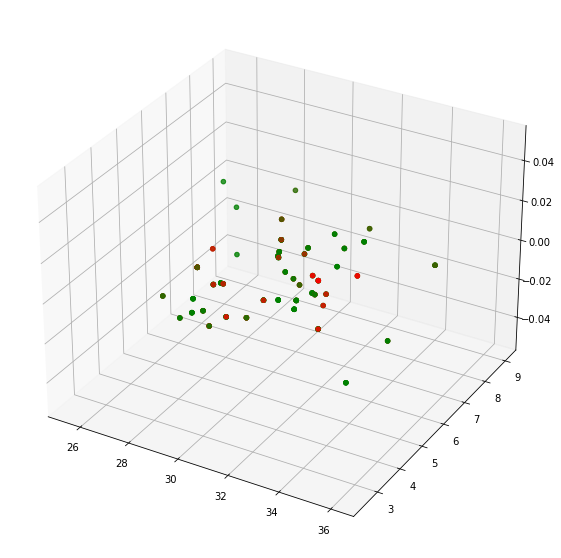

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(df1['mean'], df1['std'], c=df1['label'])
plt.show()

In [92]:
#df1.groupby(['age'])
df1

,std,mean,class
0,4.950748,27.916591,1
1,6.918456,29.476176,0
2,4.799614,32.049545,0
3,7.701354,26.863333,0
4,6.621113,30.697143,0
...,...,...,...
343,5.765213,32.038000,0
344,6.493518,32.128000,0
345,4.493117,29.023500,0
346,7.701354,26.863333,0


0.73333
0.7619
0.78095
0.78095
0.78095


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be e

Text(0, 0.5, 'Accuracy')

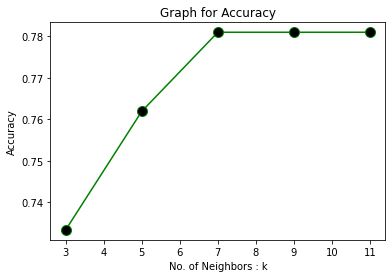

In [140]:
#knn 

import numpy as np
import sklearn.neighbors._base
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

#accuracy

k= [3,5,7,9,11]
accu = []

for x in k:
    knn_classifier = KNeighborsClassifier(n_neighbors = x)
    knn_classifier.fit(X_train, Y_train )
    k_predict = knn_classifier.predict(X_test)
    accu.append(np.mean(k_predict == Y_test))
    
for i in accu:
    print(round(i,5))
    
import matplotlib.pyplot as plt

ax= plt.gca()
plt.plot(range(3,12,2), accu, color= 'green', marker = 'o', markerfacecolor = 'black', markersize = 10)
plt.title('Graph for Accuracy' )
plt.xlabel("No. of Neighbors : k")
plt.ylabel('Accuracy')




In [201]:
#Logistic Regression

import numpy as np
import sklearn.neighbors._base
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.5, random_state = 1)
scale = StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

#Training Year 1 data
#X_train, X_test = train_test_split(df1, train_size = 0.70, test_size = 0.30, random_state = 1)

#getting features

#Xk_train = X_train[['std','mean']].values
#Xk_test = X_test[['std','mean']].values

#StandardScaler 
#scale = StandardScaler()
#scale.fit(Xk_train)
#X_train_scale = scale.transform(Xk_train)
#X_test_scale = scale.transform(Xk_test)

#label class
#label class
#Y_train = LabelEncoder().fit_transform(X_train['class'].values)
#Y_test = X_test['class'].values

#accuracy

reg_class = LogisticRegression()
reg_class.fit(X_train, Y_train)
log_predict = reg_class.predict(X_test)

#confusion matrix

#def tpr_tnr(predict,test):
#    TP, FP, TN, FN, match = 0,0,0,0,0 
#    for i in range(len(test)):
#        true_label = test[i]
#        pre_label = predict[i]
#        if true_label == pre_label:
#            match+= 1
#            
#        if true_label ==0 and pre_label ==1:
#           TP+= 1
#        elif true_label ==1 and pre_label ==0:
#            FP+= 1
#        elif true_label ==1 and pre_label ==1:
#            TN+= 1
#        elif true_label == 0 and pre_label == 1:
#            FN+= 1
#        else:
#            continue
#    
#             
#    TPR = TP/(TP+FN)
#  
#    TNR = TN/(TN+FP)
#        
        
#    #TNR = TN/(TN+FP)
#    accuracy = match/len(X_test_scale)
#    dic = [TP,FP, TN, FN, round(accuracy, 6), round(TPR, 6), round(TNR, 6)]
#    result = pd.DataFrame(dic)
#   result.index = ['TP', 'FP','TN','FN','accuracy', 'TPR', 'TNR']
#    return result


#tpr_tnr(log_predict, X_test)
#len(reg_class.predict(Xk_train))
#len(_train)
log_predict
score =accuracy_score(Y_test,log_predict)
score

0.7816091954022989

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       136
           1       0.00      0.00      0.00        38

    accuracy                           0.78       174
   macro avg       0.39      0.50      0.44       174
weighted avg       0.61      0.78      0.69       174



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

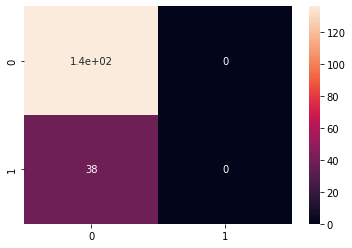

In [202]:
#logistic regression confusion matrix heat map

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, log_predict)
sns.heatmap(cm, annot=True)
print(classification_report(Y_test, log_predict))

0.7816091954022989
[[136   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       136
           1       0.00      0.00      0.00        38

    accuracy                           0.78       174
   macro avg       0.39      0.50      0.44       174
weighted avg       0.61      0.78      0.69       174



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be e

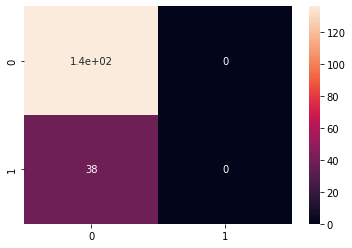

In [203]:



#accuracy for k= 9
knn_classifier = KNeighborsClassifier(n_neighbors = 9)
knn_classifier.fit(X_train, Y_train )
k_predict = knn_classifier.predict(X_test)
#perfm_meas_9 = tpr_tnr(k_predict, Y_test)

#accuracy for k= 7
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
knn_classifier.fit(X_train, Y_train )
k_predict = knn_classifier.predict(X_test)
#perfm_meas_7 = tpr_tnr(k_predict, Y_test)

from sklearn.metrics import accuracy_score

k_predict = knn_classifier.predict(X_test)

score =accuracy_score(Y_test,k_predict)
print(score)

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, k_predict)
sns.heatmap(cm, annot=True)
print(cm)
print(classification_report(Y_test, k_predict))
#sns.heatmap(conf_mat, annot=True)

0.7816091954022989
[[136   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       136
           1       0.00      0.00      0.00        38

    accuracy                           0.78       174
   macro avg       0.39      0.50      0.44       174
weighted avg       0.61      0.78      0.69       174



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

<AxesSubplot: >

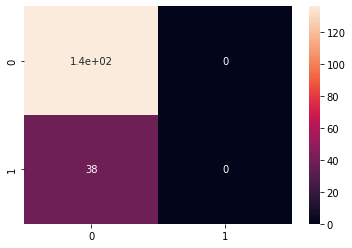

In [209]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler #fixed import


nb = GaussianNB()
nb.fit(X_train, Y_train)
scaler = MinMaxScaler()
Xk_train = scaler.fit_transform(X_train)
Xk_test = scaler.transform(X_test)

nb_classifier = MultinomialNB()

nb_classifier.fit(Xk_train, Y_train)

y_pred = nb_classifier.predict(Xk_test)

acc_score = accuracy_score(Y_test, y_pred)
conf_mat = confusion_matrix(
        Y_test, y_pred, labels = [0,1])

print(acc_score)
print(conf_mat)
print(classification_report(Y_test, y_pred))
sns.heatmap(conf_mat, annot=True)


0.7183908045977011
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       136
           1       0.26      0.16      0.20        38

    accuracy                           0.72       174
   macro avg       0.52      0.52      0.51       174
weighted avg       0.67      0.72      0.69       174



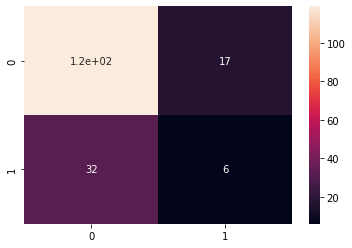

In [213]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

y_pred_test = forest.predict(X_test)

print(accuracy_score(Y_test, y_pred_test))

conf_mat = confusion_matrix(
        Y_test, y_pred_test)
conf_mat
sns.heatmap(conf_mat, annot=True)
print(classification_report(Y_test, y_pred_test))


0.764367816091954
[[132   4]
 [ 37   1]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87       136
           1       0.20      0.03      0.05        38

    accuracy                           0.76       174
   macro avg       0.49      0.50      0.46       174
weighted avg       0.65      0.76      0.69       174



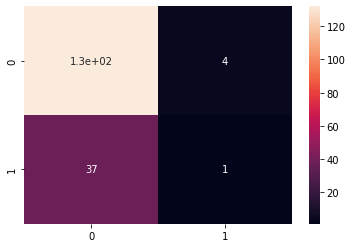

In [212]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test, y_pred))

conf_mat = confusion_matrix(
        Y_test, y_pred)
print(conf_mat)
sns.heatmap(conf_mat, annot=True)
print(classification_report(Y_test, y_pred))

In [78]:
predicted[0]

0

In [79]:
accuracy

0.7672413793103449

In [211]:
#poly SVM

#implement linear SVM

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[136   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       136
           1       0.00      0.00      0.00        38

    accuracy                           0.78       174
   macro avg       0.39      0.50      0.44       174
weighted avg       0.61      0.78      0.69       174



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [210]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, Y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[136   0]
 [ 38   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       136
           1       0.00      0.00      0.00        38

    accuracy                           0.78       174
   macro avg       0.39      0.50      0.44       174
weighted avg       0.61      0.78      0.69       174



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa